### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 08-Mar-25    

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [993]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-03-09 17:44:12


In [994]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [995]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to make the file of wss, sil scores open immediately
import os

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: stop words removal
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import WordNetLemmatizer

# model running
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [996]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [997]:
dummy_dataframe = pd.read_csv("dataset/news_Feb_14.csv")
dummy_dataframe = dummy_dataframe.iloc[:, 0]  # Select only the headline column
documents = dummy_dataframe.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [998]:
original_headlines = documents.copy()

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase

In [999]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-03-09 17:44:12


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [1000]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [1001]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. we have three options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. 
```
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]
docs_list = []
for d in document: 
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list
```
However this is not a good practice. 
- pulling stop words from ```ntlk``` library: 
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
However after running this code it didnt not remove stop words thus i removed it
- intializing stop_words in ```CountVectorizer()``` however here we are not using it
- using the ```ENGLISH_STOP_WORDS``` in ```sklearn```
```
tokens = [word for word in tokens if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS]  
```
Lets try it and see it how it goes.

In [1002]:
# Tokenize each document
tokenized_docs = [word_tokenize(doc) for doc in documents] 

# Remove stop words
filtered_docs = [[word for word in doc if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS] for doc in tokenized_docs]

# Convert back to sentences if needed
documents = [" ".join(doc) for doc in filtered_docs]

documents

['ecc endorses purchase 582 mn capital shares bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff rows trump modi talks',
 'aurangzeb discusses pakistans structural reforms ifc chief',
 'hbl , sp global launch pakistans manufacturing pmi',
 'kse 100 closes 479 points lower late session selling erases intra day gains',
 'ppl executes agreements sui gas field operations',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee records marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold adds record rally , reaches rs 306,200 tola pakistan',
 'imfs 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promises dubai loop tunnel network',
 'reforming pension funds pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judges',
 '

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

here we perform lemmatization as in the previous assignment, lemmatization had worked much better

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. after our 48 trials in the previous assignment, lemmatization was much better.

In [1003]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [1004]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase 582 mn capital share bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff row trump modi talk',
 'aurangzeb discusses pakistan structural reform ifc chief',
 'hbl , sp global launch pakistan manufacturing pmi',
 'kse 100 close 479 point lower late session selling erases intra day gain',
 'ppl executes agreement sui gas field operation',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee record marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold add record rally , reach r 306,200 tola pakistan',
 'imf 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promise dubai loop tunnel network',
 'reforming pension fund pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judge',
 'solar panel import 8

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

for this assignment, we will focus on unigrams.

In [1005]:
# because we want unigrams, we DO NOT have to do anything and we will leave it the way it is

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- word2Vec
- doc2vec

in this code we are exploring the first method

## Word2Vec
in word2vec we have two methods:
- cbow architecture (target is predicted by context)
- skipgram (target predicts context)

In [1006]:
# for sg variable
# sg = 0 # CBOW
sg = 1 # Skip-Gram

if sg == 0:
    model_type = 'CBOW'
else:
    model_type = 'Skipgram'

print(f"sg={sg}, model={model_type}")

sg=1, model=Skipgram


### Variables to set
here we set variables like vector_size, window_size, count of epochs etc. we define them here so that in the code we dont have to change them. We can easily change them here and the code will change accordingly.

one thing to note here is that before starting the assignment i will make a list of each variable and what i want to test. then i will iterate over each variable keeping rest fixed, and write a loop to iterate over that variable and then i will select that as best. then for the next i will use its list but that previous one will be in its best. this will help me run as many things as i want in one code run.

In [1007]:
vector_sizes = [50, 100, 150, 200, 250, 300]
# vector_sizes = [300, 325, 350, 400]
# vector_sizes = [400, 410, 425, 450, 500]
selected_vector_size = 400

In [1008]:
windows = [3, 5, 7, 10, 12, 15, 20]
# windows = [8, 9, 10, 11, 12]
selected_window = 15

In [1009]:
epochs = [25, 50, 100, 150, 200]
# epochs = [5, 10, 20, 30, 40, 50, 60]
selected_epoch = epochs[0]

### Code declaration
here we declare our code using the following syntax

In [1010]:
def get_avg_word2vec(tokens, model, vector_size=300):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size) 

In [1011]:
def run_word2vec (docs, vector_size, window_size, epoch):
    word2vec_model = Word2Vec(
        sentences=docs,                        # Tokenized text
        vector_size=vector_size,           # Each word is represented by a x-dimensional vector
        window=window_size,                     # Context window size
        min_count=1,                                # Ignores words that appear less than 'min_count' times
        workers=4,                                  # Number of CPU cores used
        sg=sg,                   
        epochs=epoch                       # Number of training iterations
    )
    # print(word2vec_model)
    
    # Convert the list to a Pandas Series
    documents_series = pd.Series(docs)

    docs = documents_series.apply(lambda x: get_avg_word2vec(x, word2vec_model))    
    docs = np.array(docs.tolist())
    
    # print(docs)
    
    return docs

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [1012]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [1013]:
def run_k_means(k, data, results, vector_size, window, epoch):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    results.append([k, f'Word2Vec', vector_size, window, epoch, model_type, silhouette_avg, wss])
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")
    
    return silhouette_avg, wss

## Code Running
here we run the code in a for-loop, because we have many variables we need to test with k-means. thus we test them here.

In [1014]:
copy_of_docs = documents

In [1015]:
window = selected_window
# epoch = selected_epoch
vector_size = selected_vector_size
# the variable that is commented means that is the variable being tested

In [1016]:
# define a output that will save each case WSS and silhoutee so that it can be saved into a csv file later on
results = []

In [1017]:
# define an output that will save each WSS with its k so that we can plot a scree plot later on
wss_scores = []

In [1018]:
# define a variable that will save the best combination for reference at the end
best_combination = []
best_WSS = 100000000000000000000000000 # we want lowest wss so we start with large value
best_Sil = 0    # we want max sil so we start with small value

In [1019]:
def run_combinations(k, best_combination, best_Sil, best_WSS):
    sum_wss = 0
    count_wss = 0

    for epoch in epochs:
        print("Executed at:", get_current_datetime(), "\n")
        documents = run_word2vec(copy_of_docs, vector_size, window, epoch)
        print(f"sg={sg}, Vector_Size={vector_size}, Window={window}, Epoch={epoch}")
        print("Finished displaying at:", get_current_datetime(), "\n")
        sil, wss = run_k_means(k, documents, results, vector_size, window, epoch)
        
        # sum the wss to find average for elbow plot
        sum_wss += wss
        count_wss += 1
        
        # compute max(sil, best_sil) and min(wss, best_wss) to find the BEST
        if sil > best_Sil and wss < best_WSS:
            best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
            best_WSS = wss
            best_Sil = sil
        else:
            # if best not found, pick if WSS is best however SIL is not best but it should be within 0.05 range
            sil_diff = best_Sil - sil
            wss_diff = best_WSS - wss
            if sil_diff >= 0 and sil_diff < 0.05 and wss_diff > 0:
                best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
                best_WSS = wss
                best_Sil = sil

    # once all combinations are tested, compute average and append that for elbow plots for that k
    avg_wss = sum_wss / count_wss
    wss_scores.append([k, avg_wss])
    
    return best_combination, best_Sil, best_WSS

2025-03-09 17:44:17,659 : INFO : collecting all words and their counts
2025-03-09 17:44:17,660 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:44:17,664 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:44:17,675 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:44:17,678 : INFO : Creating a fresh vocabulary
2025-03-09 17:44:17,685 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:44:17.685120', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:44:17,689 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 17:44:17 



2025-03-09 17:44:17,965 : INFO : EPOCH 1: training on 24723 raw words (4722 effective words) took 0.1s, 39870 effective words/s
2025-03-09 17:44:18,084 : INFO : EPOCH 2: training on 24723 raw words (4765 effective words) took 0.1s, 46679 effective words/s
2025-03-09 17:44:18,196 : INFO : EPOCH 3: training on 24723 raw words (4646 effective words) took 0.1s, 46843 effective words/s
2025-03-09 17:44:18,307 : INFO : EPOCH 4: training on 24723 raw words (4634 effective words) took 0.1s, 50283 effective words/s
2025-03-09 17:44:18,418 : INFO : EPOCH 5: training on 24723 raw words (4736 effective words) took 0.1s, 49805 effective words/s
2025-03-09 17:44:18,524 : INFO : EPOCH 6: training on 24723 raw words (4660 effective words) took 0.1s, 51677 effective words/s
2025-03-09 17:44:18,636 : INFO : EPOCH 7: training on 24723 raw words (4735 effective words) took 0.1s, 47779 effective words/s
2025-03-09 17:44:18,750 : INFO : EPOCH 8: training on 24723 raw words (4629 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=25
Finished displaying at: 2025-03-09 17:44:20 

Executing 5 start time: 2025-03-09 17:44:20
K=5: Silhouette Score and WSS=0.1504	0.6378

Cluster 0:
- PGF’s ‘train the trainers program’ boosts golf coaching in Pakistan
- HBL, S&P Global launch Pakistan’s first manufacturing PMI
- PTI backed military courts after APS attack, says Justice Hilali
- Afghanistan — the perils of cuddling India
- If love hurts, the Sufis say you’re doing it right

Cluster 1:
- Stocks remain range-bound, KSE-100 closes 361 points lower
- Champions Trophy 2025 Prize Money Breakdown in Pakistani rupee for 2025
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- PSX witnesses bearish trend, loses 360 points
- Gold price soars by Rs2,500 per tola

Cluster 2:
- Chamber president, Customs men kidnapped in South Waziristan
- TikTok’s Back in the Game! The Viral App Finally Returns to U.S. App Stores!
- Lawyer admits PTI’s decision to support military co

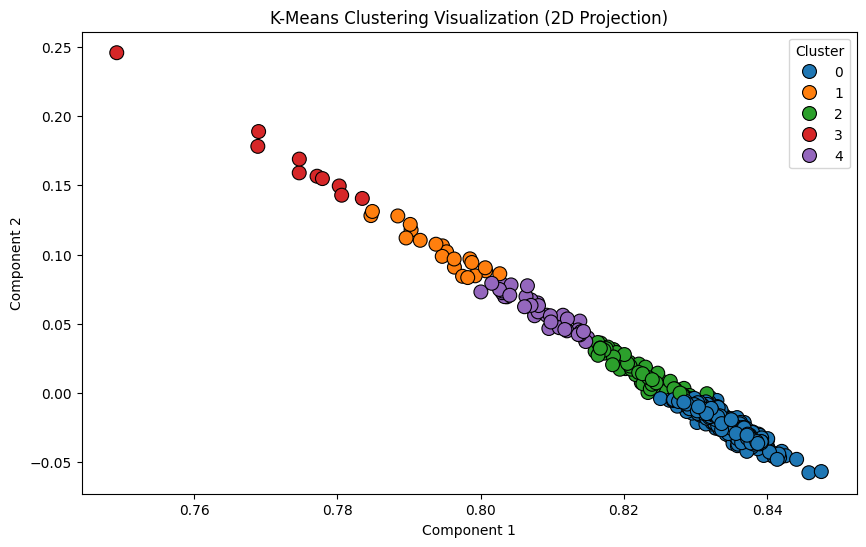

2025-03-09 17:44:21,589 : INFO : collecting all words and their counts
2025-03-09 17:44:21,591 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:44:21,594 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:44:21,605 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:44:21,607 : INFO : Creating a fresh vocabulary
2025-03-09 17:44:21,609 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:44:21.609723', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:44:21,613 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:44:21 

Finished executing at: 2025-03-09 17:44:21 

Executed at: 2025-03-09 17:44:21 



2025-03-09 17:44:21,892 : INFO : EPOCH 1: training on 24723 raw words (4713 effective words) took 0.1s, 42584 effective words/s
2025-03-09 17:44:22,009 : INFO : EPOCH 2: training on 24723 raw words (4588 effective words) took 0.1s, 45939 effective words/s
2025-03-09 17:44:22,135 : INFO : EPOCH 3: training on 24723 raw words (4774 effective words) took 0.1s, 44042 effective words/s
2025-03-09 17:44:22,254 : INFO : EPOCH 4: training on 24723 raw words (4607 effective words) took 0.1s, 44943 effective words/s
2025-03-09 17:44:22,354 : INFO : EPOCH 5: training on 24723 raw words (4632 effective words) took 0.1s, 53169 effective words/s
2025-03-09 17:44:22,464 : INFO : EPOCH 6: training on 24723 raw words (4742 effective words) took 0.1s, 48863 effective words/s
2025-03-09 17:44:22,567 : INFO : EPOCH 7: training on 24723 raw words (4608 effective words) took 0.1s, 54179 effective words/s
2025-03-09 17:44:22,678 : INFO : EPOCH 8: training on 24723 raw words (4596 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=50
Finished displaying at: 2025-03-09 17:44:25 

Executing 5 start time: 2025-03-09 17:44:25
K=5: Silhouette Score and WSS=0.0937	1.2168

Cluster 0:
- House Democrats urge Trump to retract comments on Gaza
- Govt reshuffles key bureaucratic positions, appoints new MD for Utility Stores
- Trump launches ‘reciprocal tariffs’ for allies, rivals
- Holding peaceful meetings democratic right of all parties, says Irfan Siddiqui
- Crude Oil prices rebound with slight gain amid US Tariff delay, strong demand

Cluster 1:
- Bano Butt: The Trailblazer changing the face of Women’s MMA in Pakistan
- HBL, S&P Global launch Pakistan’s first manufacturing PMI
- Azaan Sami Khan pens birthday note for daughter
- Hasan Raheem softens down his song 'Obvious'
- Karachi basketball at crossroads as rival factions clash

Cluster 2:
- Man shoots himself dead after killing 4 children in Swabi: officials
- Petrol Price in Pakistan to ‘go down’ from Feb 16 amid dip in global

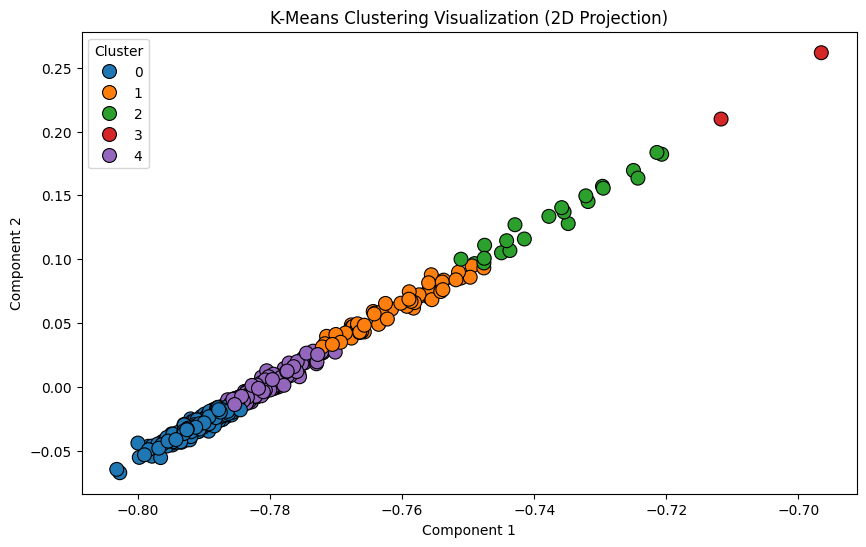

2025-03-09 17:44:26,420 : INFO : collecting all words and their counts
2025-03-09 17:44:26,422 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:44:26,423 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:44:26,431 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:44:26,432 : INFO : Creating a fresh vocabulary
2025-03-09 17:44:26,434 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:44:26.434510', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:44:26,436 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:44:26 

Finished executing at: 2025-03-09 17:44:26 

Executed at: 2025-03-09 17:44:26 



2025-03-09 17:44:26,651 : INFO : EPOCH 2: training on 24723 raw words (4686 effective words) took 0.1s, 84969 effective words/s
2025-03-09 17:44:26,720 : INFO : EPOCH 3: training on 24723 raw words (4727 effective words) took 0.1s, 92041 effective words/s
2025-03-09 17:44:26,781 : INFO : EPOCH 4: training on 24723 raw words (4702 effective words) took 0.0s, 99896 effective words/s
2025-03-09 17:44:26,858 : INFO : EPOCH 5: training on 24723 raw words (4683 effective words) took 0.1s, 76543 effective words/s
2025-03-09 17:44:26,919 : INFO : EPOCH 6: training on 24723 raw words (4578 effective words) took 0.0s, 96304 effective words/s
2025-03-09 17:44:26,983 : INFO : EPOCH 7: training on 24723 raw words (4580 effective words) took 0.0s, 94817 effective words/s
2025-03-09 17:44:27,056 : INFO : EPOCH 8: training on 24723 raw words (4780 effective words) took 0.1s, 74700 effective words/s
2025-03-09 17:44:27,140 : INFO : EPOCH 9: training on 24723 raw words (4603 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=100
Finished displaying at: 2025-03-09 17:44:37 

Executing 5 start time: 2025-03-09 17:44:37
K=5: Silhouette Score and WSS=0.1025	1.5021

Cluster 0:
- PA pre-budget debate overshadowed by lawmakers’ apathy
- Workshop stresses for shaping equitable, sustainable food systems
- International Childhood Cancer Day: Living well till the end
- Ahmer honored for contributions to squash at K2 Squash Gold Event
- Mohsin Naqvi announces three-day spring festival in Islamabad

Cluster 1:
- Conspiracy theorist Gabbard confirmed as new US spy chief
- Mehwish Hayat is All Set to Return to Our Television Screens After 7 Years!
- Non-banking microfinance sector: SECP announces series of initiatives to empower women, strengthen consumer protection
- CCP reviewing PTCL-Telenor merger ahead of spectrum auction
- Hamas urges Arab summit, OIC meeting to reject Trump’s plan for Palestinian displacement

Cluster 2:
- Over 16,000 School Teacher Jobs 2025 – Here’s all yo

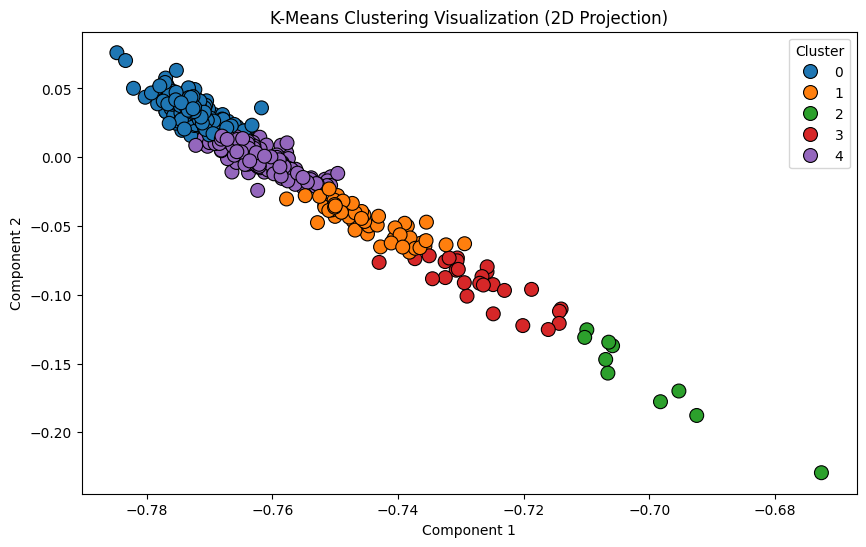

2025-03-09 17:44:37,792 : INFO : collecting all words and their counts
2025-03-09 17:44:37,794 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:44:37,796 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:44:37,805 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:44:37,809 : INFO : Creating a fresh vocabulary
2025-03-09 17:44:37,812 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:44:37.812926', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:44:37,814 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:44:37 

Finished executing at: 2025-03-09 17:44:37 

Executed at: 2025-03-09 17:44:37 



2025-03-09 17:44:38,132 : INFO : EPOCH 1: training on 24723 raw words (4724 effective words) took 0.2s, 30212 effective words/s
2025-03-09 17:44:38,341 : INFO : EPOCH 2: training on 24723 raw words (4654 effective words) took 0.2s, 28953 effective words/s
2025-03-09 17:44:38,484 : INFO : EPOCH 3: training on 24723 raw words (4647 effective words) took 0.1s, 36598 effective words/s
2025-03-09 17:44:38,592 : INFO : EPOCH 4: training on 24723 raw words (4578 effective words) took 0.1s, 47895 effective words/s
2025-03-09 17:44:38,700 : INFO : EPOCH 5: training on 24723 raw words (4656 effective words) took 0.1s, 49592 effective words/s
2025-03-09 17:44:38,811 : INFO : EPOCH 6: training on 24723 raw words (4677 effective words) took 0.1s, 47428 effective words/s
2025-03-09 17:44:38,920 : INFO : EPOCH 7: training on 24723 raw words (4716 effective words) took 0.1s, 48964 effective words/s
2025-03-09 17:44:39,026 : INFO : EPOCH 8: training on 24723 raw words (4696 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=150
Finished displaying at: 2025-03-09 17:44:53 

Executing 5 start time: 2025-03-09 17:44:53
K=5: Silhouette Score and WSS=0.0744	1.6529

Cluster 0:
- PARTLY FACETIOUS: Our stakeholders know everything about everything
- The Digital Cold War: AI, Blockchain, Fintech, and the US-China Battle for Financial Dominance Pt 2
- Rawalpindi police arrest primary suspect in college student ‘honour’ killing case
- Security forces kill 13 terrorists in KP operations
- At least 9 dead, 7 injured in Balochistan’s Harnai blast

Cluster 1:
- Senate pays rich tributes to Prince Karim Aga Khan
- Former SC judge Sheikh Azmat Saeed’s funeral to be held today
- 'Qubool Hai:' Kubra Khan and Gohar Rasheed Have Tied the Knot in Makkah
- Sabrina Carpenter's 'Bad Reviews' lyrics spark rumors about Barry Keoghan after clues in album
- Who is Maham Batool? Meet Ahmed Ali Akbar’s bride

Cluster 2:
- Everyone can’t go to jail to meet Imran: IHC CJ
- CJP Afridi administers oa

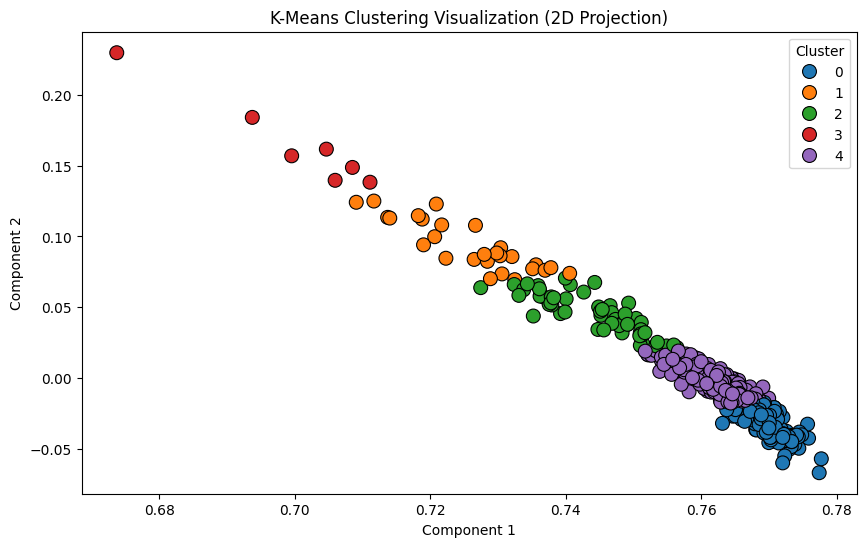

2025-03-09 17:44:54,835 : INFO : collecting all words and their counts
2025-03-09 17:44:54,837 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:44:54,838 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:44:54,846 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:44:54,848 : INFO : Creating a fresh vocabulary
2025-03-09 17:44:54,850 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:44:54.850967', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:44:54,854 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:44:54 

Finished executing at: 2025-03-09 17:44:54 

Executed at: 2025-03-09 17:44:54 



2025-03-09 17:44:55,065 : INFO : EPOCH 1: training on 24723 raw words (4732 effective words) took 0.1s, 62194 effective words/s
2025-03-09 17:44:55,166 : INFO : EPOCH 2: training on 24723 raw words (4630 effective words) took 0.1s, 53375 effective words/s
2025-03-09 17:44:55,267 : INFO : EPOCH 3: training on 24723 raw words (4545 effective words) took 0.1s, 52836 effective words/s
2025-03-09 17:44:55,369 : INFO : EPOCH 4: training on 24723 raw words (4644 effective words) took 0.1s, 51705 effective words/s
2025-03-09 17:44:55,469 : INFO : EPOCH 5: training on 24723 raw words (4675 effective words) took 0.1s, 54077 effective words/s
2025-03-09 17:44:55,574 : INFO : EPOCH 6: training on 24723 raw words (4729 effective words) took 0.1s, 51377 effective words/s
2025-03-09 17:44:55,674 : INFO : EPOCH 7: training on 24723 raw words (4702 effective words) took 0.1s, 53123 effective words/s
2025-03-09 17:44:55,773 : INFO : EPOCH 8: training on 24723 raw words (4740 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=200
Finished displaying at: 2025-03-09 17:45:12 

Executing 5 start time: 2025-03-09 17:45:12
K=5: Silhouette Score and WSS=0.0815	1.6825

Cluster 0:
- US Attorney General Pam Bondi files lawsuit against New York's immigration law
- ‘England can be dangerous in Champions Trophy despite India loss’, says Butler
- Pakistan Refinery says will shut down plant for ‘approximately 6 days’
- Pakistan, Turkiye sign multiple agreements to boost bilateral relations
- CJP Yahya Afridi administers oath to six newly appointed SC judges

Cluster 1:
- Lady Gaga shocked by Sean Evans’ deep-cut questions in Hot Ones teaser
- Centre exploring olive production on commercial basis in Chagai
- Gazans return to ruined homes and severe water shortage
- Wang's London visit marks revival of UK ties
- Volunteers’ climate taskforce to be set up for meaningful environmental action

Cluster 2:
- SBP reserves fall $500m in less than a month | Dawn News English
- Pakistan, Turk

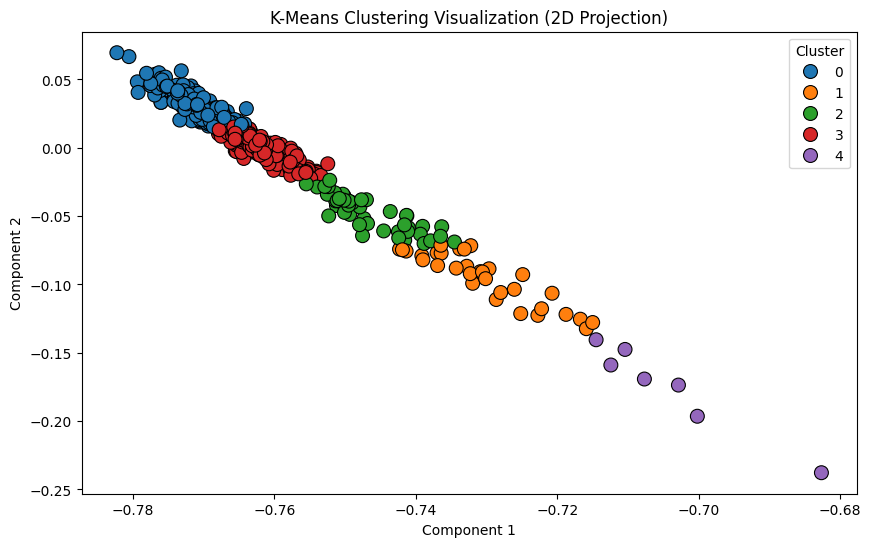

Finished displaying at: 2025-03-09 17:45:12 

Finished executing at: 2025-03-09 17:45:12 



In [1020]:
best_combination, best_Sil, best_WSS = run_combinations(5, best_combination, best_Sil, best_WSS)

2025-03-09 17:45:12,894 : INFO : collecting all words and their counts
2025-03-09 17:45:12,900 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:45:12,912 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:45:12,924 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:45:12,927 : INFO : Creating a fresh vocabulary
2025-03-09 17:45:12,935 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:45:12.935004', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:45:12,938 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 17:45:12 



2025-03-09 17:45:13,071 : INFO : EPOCH 0: training on 24723 raw words (4678 effective words) took 0.1s, 56964 effective words/s
2025-03-09 17:45:13,154 : INFO : EPOCH 1: training on 24723 raw words (4732 effective words) took 0.1s, 65751 effective words/s
2025-03-09 17:45:13,228 : INFO : EPOCH 2: training on 24723 raw words (4658 effective words) took 0.1s, 74759 effective words/s
2025-03-09 17:45:13,308 : INFO : EPOCH 3: training on 24723 raw words (4739 effective words) took 0.1s, 68335 effective words/s
2025-03-09 17:45:13,384 : INFO : EPOCH 4: training on 24723 raw words (4697 effective words) took 0.1s, 69096 effective words/s
2025-03-09 17:45:13,467 : INFO : EPOCH 5: training on 24723 raw words (4699 effective words) took 0.1s, 66166 effective words/s
2025-03-09 17:45:13,550 : INFO : EPOCH 6: training on 24723 raw words (4737 effective words) took 0.1s, 66088 effective words/s
2025-03-09 17:45:13,628 : INFO : EPOCH 7: training on 24723 raw words (4664 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=25
Finished displaying at: 2025-03-09 17:45:14 

Executing 9 start time: 2025-03-09 17:45:14
K=9: Silhouette Score and WSS=0.1309	0.6448

Cluster 0:
- Field of education: Pakistan, Kazakhstan for enhancing mutual cooperation
- Saudi Arabia to host Arab summit on Trump’s Gaza plan
- 'Qubool Hai:' Kubra Khan and Gohar Rasheed Have Tied the Knot in Makkah
- Who is Maham Batool? Meet Ahmed Ali Akbar’s bride
- Australia’s Johnson sees chance to shine while ‘Big Three’ quicks away

Cluster 1:
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks
- Honda City updated five-year installment plan in Pakistan for Feb 2025
- India expects $200 million missile deal with Philippines this year, sources say
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Govt hikes RLNG prices by up to 1.86pc

Cluster 2:
- CJP Afridi administers oath to newly-appointed SC judges
- ‘We risk losing hold on reality’: Scarlett Johans

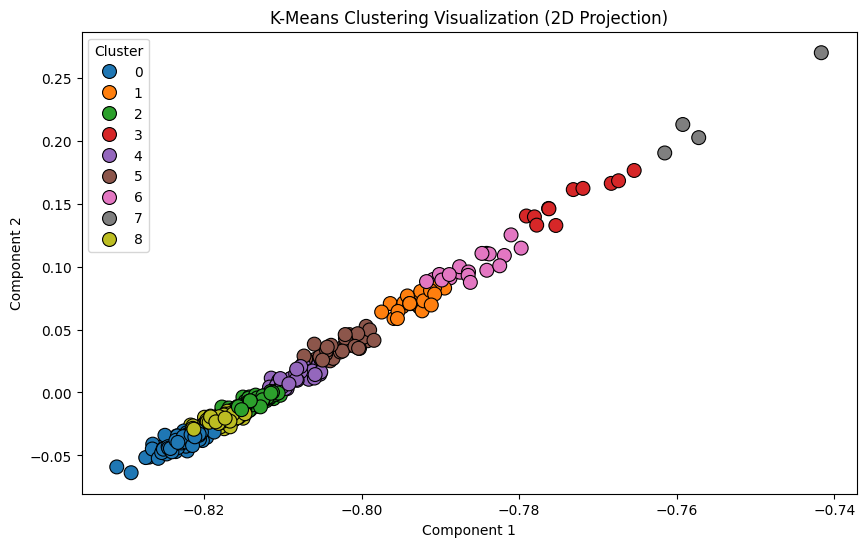

2025-03-09 17:45:15,537 : INFO : collecting all words and their counts
2025-03-09 17:45:15,539 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:45:15,540 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:45:15,549 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:45:15,551 : INFO : Creating a fresh vocabulary
2025-03-09 17:45:15,555 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:45:15.555472', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:45:15,557 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:45:15 

Finished executing at: 2025-03-09 17:45:15 

Executed at: 2025-03-09 17:45:15 



2025-03-09 17:45:15,726 : INFO : EPOCH 0: training on 24723 raw words (4661 effective words) took 0.1s, 42086 effective words/s
2025-03-09 17:45:15,831 : INFO : EPOCH 1: training on 24723 raw words (4742 effective words) took 0.1s, 53953 effective words/s
2025-03-09 17:45:15,916 : INFO : EPOCH 2: training on 24723 raw words (4686 effective words) took 0.1s, 66525 effective words/s
2025-03-09 17:45:15,992 : INFO : EPOCH 3: training on 24723 raw words (4727 effective words) took 0.1s, 71493 effective words/s
2025-03-09 17:45:16,065 : INFO : EPOCH 4: training on 24723 raw words (4702 effective words) took 0.1s, 84109 effective words/s
2025-03-09 17:45:16,137 : INFO : EPOCH 5: training on 24723 raw words (4683 effective words) took 0.1s, 84253 effective words/s
2025-03-09 17:45:16,213 : INFO : EPOCH 6: training on 24723 raw words (4578 effective words) took 0.1s, 78792 effective words/s
2025-03-09 17:45:16,284 : INFO : EPOCH 7: training on 24723 raw words (4580 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=50
Finished displaying at: 2025-03-09 17:45:19 

Executing 9 start time: 2025-03-09 17:45:19
K=9: Silhouette Score and WSS=0.1049	1.0843

Cluster 0:
- Haveli of Maharaja Ranjit Singh being conserved by WCLA
- 28 injured in car ramming attack in Munich
- 'No fear of references if innocent,' says Justice Mansoor Ali Shah
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- Law ministry notifies appointments of six SC judges, four high court chief justices

Cluster 1:
- CM Maryam announces 3-marla plots for homeless people
- Local bodies members flexing muscles for another protest in Peshawar
- Hamas vows to uphold truce, plans to proceed with hostage-prisoner swap
- Govt has no plan to impose new taxes: NA told
- Petrol price expected to drop in next review

Cluster 2:
- Lahore set to host 9th Faiz Festival 2025 from today
- Israeli military killed 85 journalists in 2024: CPJ
- Journalist killings reach record high in 2024
- Champion

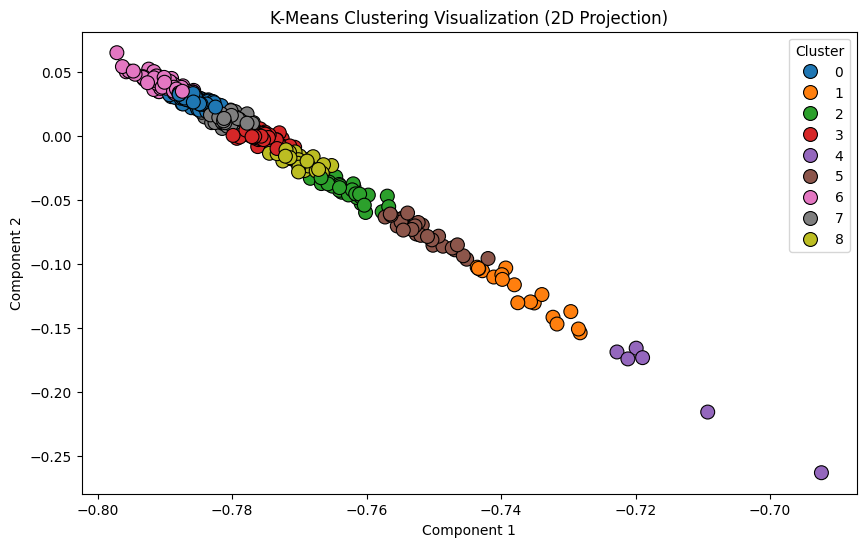

2025-03-09 17:45:21,000 : INFO : collecting all words and their counts
2025-03-09 17:45:21,002 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:45:21,005 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:45:21,013 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:45:21,015 : INFO : Creating a fresh vocabulary
2025-03-09 17:45:21,017 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:45:21.017487', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:45:21,019 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:45:20 

Finished executing at: 2025-03-09 17:45:20 

Executed at: 2025-03-09 17:45:20 



2025-03-09 17:45:21,204 : INFO : EPOCH 1: training on 24723 raw words (4742 effective words) took 0.1s, 83427 effective words/s
2025-03-09 17:45:21,291 : INFO : EPOCH 2: training on 24723 raw words (4686 effective words) took 0.1s, 68034 effective words/s
2025-03-09 17:45:21,369 : INFO : EPOCH 3: training on 24723 raw words (4755 effective words) took 0.1s, 68897 effective words/s
2025-03-09 17:45:21,458 : INFO : EPOCH 4: training on 24723 raw words (4678 effective words) took 0.1s, 61128 effective words/s
2025-03-09 17:45:21,525 : INFO : EPOCH 5: training on 24723 raw words (4732 effective words) took 0.1s, 92653 effective words/s
2025-03-09 17:45:21,595 : INFO : EPOCH 6: training on 24723 raw words (4686 effective words) took 0.1s, 79127 effective words/s
2025-03-09 17:45:21,664 : INFO : EPOCH 7: training on 24723 raw words (4645 effective words) took 0.1s, 89462 effective words/s
2025-03-09 17:45:21,738 : INFO : EPOCH 8: training on 24723 raw words (4583 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=100
Finished displaying at: 2025-03-09 17:45:31 

Executing 9 start time: 2025-03-09 17:45:31
K=9: Silhouette Score and WSS=0.0631	1.3667

Cluster 0:
- 28 injured in car ramming attack in Munich
- Naqvi inaugurates passport office at NADRA Mega Centre in Karachi’s Nazimabad
- William Shatner accuses Mark Hamill of ruining Star Wars
- Marwat reaffirms unwavering loyalty to Imran Khan
- Afghanistan — the perils of cuddling India

Cluster 1:
- Two soldiers hurt in Indian firing at LoC
- PM condemns Harnai blast, vows action against culprits
- Taco Bell security guard caught on video slapping female customer in shocking incident
- Europe, Kyiv warn Trump against ‘dirty deal’ on Ukraine
- Pope Francis taken to hospital for bronchitis after struggling to speak

Cluster 2:
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks
- Pakistan Air Force fighter Jets to kick off ICC Champions Trophy 2025 in Style
- Second polio case of 2025

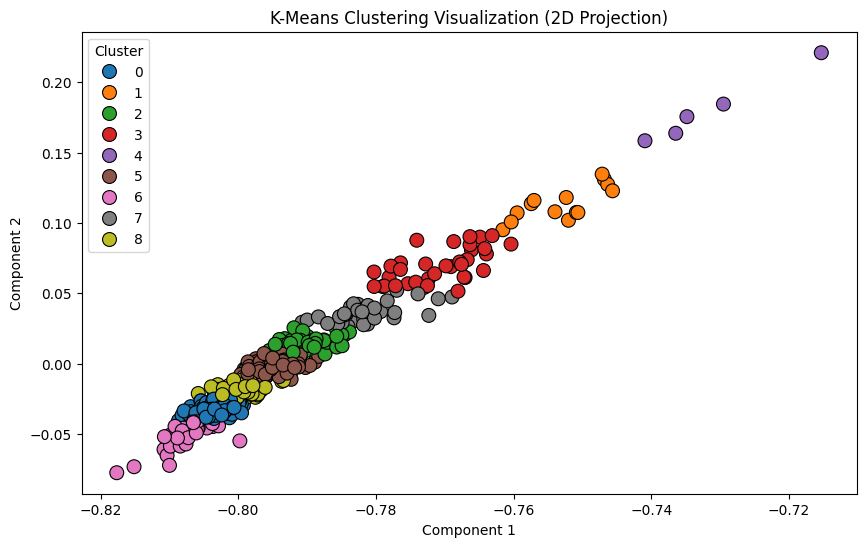

2025-03-09 17:45:32,527 : INFO : collecting all words and their counts
2025-03-09 17:45:32,530 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:45:32,533 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:45:32,543 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:45:32,548 : INFO : Creating a fresh vocabulary
2025-03-09 17:45:32,551 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:45:32.551641', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:45:32,555 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:45:32 

Finished executing at: 2025-03-09 17:45:32 

Executed at: 2025-03-09 17:45:32 



2025-03-09 17:45:32,701 : INFO : EPOCH 0: training on 24723 raw words (4661 effective words) took 0.1s, 45594 effective words/s
2025-03-09 17:45:32,831 : INFO : EPOCH 1: training on 24723 raw words (4742 effective words) took 0.1s, 42533 effective words/s
2025-03-09 17:45:32,948 : INFO : EPOCH 2: training on 24723 raw words (4684 effective words) took 0.1s, 47216 effective words/s
2025-03-09 17:45:33,091 : INFO : EPOCH 3: training on 24723 raw words (4744 effective words) took 0.1s, 38157 effective words/s
2025-03-09 17:45:33,227 : INFO : EPOCH 4: training on 24723 raw words (4682 effective words) took 0.1s, 39135 effective words/s
2025-03-09 17:45:33,353 : INFO : EPOCH 5: training on 24723 raw words (4664 effective words) took 0.1s, 44057 effective words/s
2025-03-09 17:45:33,516 : INFO : EPOCH 6: training on 24723 raw words (4711 effective words) took 0.1s, 33244 effective words/s
2025-03-09 17:45:33,668 : INFO : EPOCH 7: training on 24723 raw words (4664 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=150
Finished displaying at: 2025-03-09 17:45:51 

Executing 9 start time: 2025-03-09 17:45:51
K=9: Silhouette Score and WSS=0.0864	1.4268

Cluster 0:
- CJP Yahya Afridi administers oath to six newly appointed SC judges
- Jeffrey Sachs: Trump's tariff policy bound to fail
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- ‘Is this the same team?’: Cricket fans rejoice as Pakistan clinches record-breaking victory against South Africa
- JUI-F chief stands with journalists against PECA law

Cluster 1:
- Elon Musk announces 'Dubai Loop' underground transport system project
- ICC announces prize money breakdown for Champions Trophy
- CM Maryam announces 3-marla plots for homeless people
- Shab-e-Barat being observed with religious fervour across country
- Police charge couple with murder of child maid

Cluster 2:
- Champions Trophy 2025: squads, groups and schedule
- Gold adds to record rally, reaches Rs306,200 per tola in Pakistan
- S

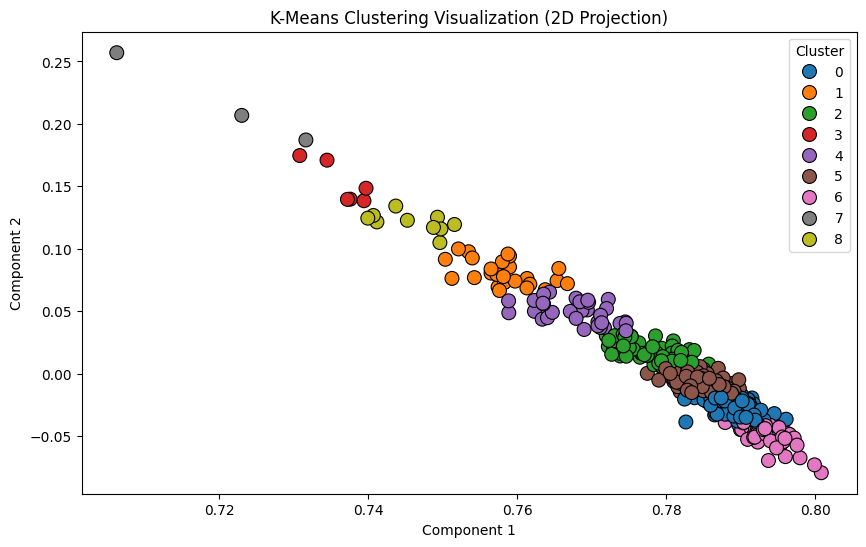

2025-03-09 17:45:52,591 : INFO : collecting all words and their counts
2025-03-09 17:45:52,593 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:45:52,594 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:45:52,601 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:45:52,603 : INFO : Creating a fresh vocabulary
2025-03-09 17:45:52,605 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:45:52.605457', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:45:52,607 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:45:52 

Finished executing at: 2025-03-09 17:45:52 

Executed at: 2025-03-09 17:45:52 



2025-03-09 17:45:52,841 : INFO : EPOCH 2: training on 24723 raw words (4686 effective words) took 0.1s, 80779 effective words/s
2025-03-09 17:45:52,925 : INFO : EPOCH 3: training on 24723 raw words (4727 effective words) took 0.1s, 73849 effective words/s
2025-03-09 17:45:52,999 : INFO : EPOCH 4: training on 24723 raw words (4702 effective words) took 0.1s, 87762 effective words/s
2025-03-09 17:45:53,067 : INFO : EPOCH 5: training on 24723 raw words (4683 effective words) took 0.1s, 78926 effective words/s
2025-03-09 17:45:53,144 : INFO : EPOCH 6: training on 24723 raw words (4578 effective words) took 0.1s, 77161 effective words/s
2025-03-09 17:45:53,221 : INFO : EPOCH 7: training on 24723 raw words (4673 effective words) took 0.1s, 76966 effective words/s
2025-03-09 17:45:53,297 : INFO : EPOCH 8: training on 24723 raw words (4654 effective words) took 0.1s, 70856 effective words/s
2025-03-09 17:45:53,371 : INFO : EPOCH 9: training on 24723 raw words (4748 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=200
Finished displaying at: 2025-03-09 17:46:20 

Executing 9 start time: 2025-03-09 17:46:20
K=9: Silhouette Score and WSS=0.0642	1.4819

Cluster 0:
- ‘Wacky Races’ character designer Jerry Eisenberg dies at 87
- Oscar winner Bong Joon-ho returns to big screen with Mickey 17
- AJK interior minister claims India behind smuggling, IED incidents along LoC
- 28 injured in car ramming attack in Munich
- Law ministry notifies appointments of six SC judges, four high court chief justices

Cluster 1:
- Fitness, registration of heavy vehicles: Sindh govt to proactively pursue the objective: Sharjeel
- Authentic Voices in a Sea of Noise
- Livestock cards to be delivered on time, says minister
- Immediate action urged to save endangered pangolins in Pakistan
- India’s FX reserves rise to over one-month high on revaluation gains

Cluster 2:
- FPSC issues latest public notice regarding CSS Exams 2025
- Israeli military killed 85 journalists in 2024: CPJ
- Dr

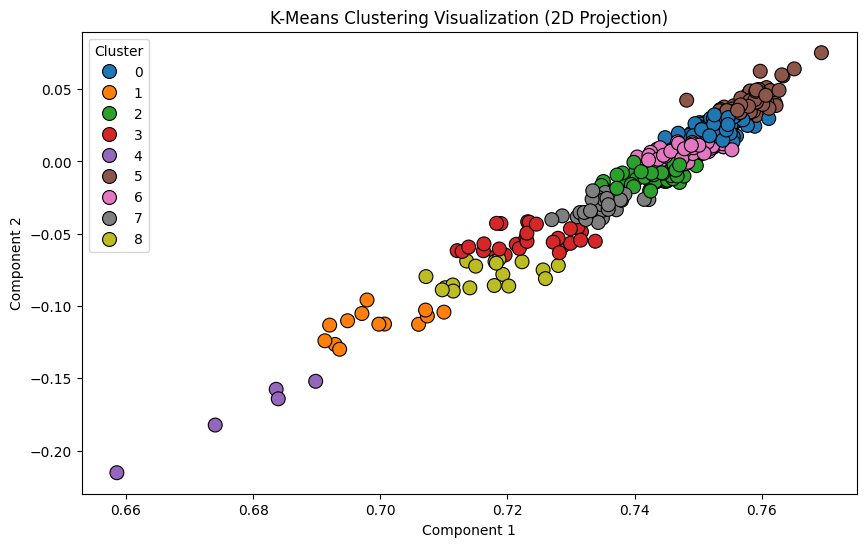

Finished displaying at: 2025-03-09 17:46:21 

Finished executing at: 2025-03-09 17:46:21 



In [1021]:
best_combination, best_Sil, best_WSS = run_combinations(9, best_combination, best_Sil, best_WSS)

2025-03-09 17:46:21,839 : INFO : collecting all words and their counts
2025-03-09 17:46:21,843 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:46:21,846 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:46:21,863 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:46:21,865 : INFO : Creating a fresh vocabulary
2025-03-09 17:46:21,869 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:46:21.869572', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:46:21,875 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 17:46:21 



2025-03-09 17:46:22,089 : INFO : EPOCH 0: training on 24723 raw words (4678 effective words) took 0.1s, 32133 effective words/s
2025-03-09 17:46:22,238 : INFO : EPOCH 1: training on 24723 raw words (4721 effective words) took 0.1s, 37787 effective words/s
2025-03-09 17:46:22,428 : INFO : EPOCH 2: training on 24723 raw words (4548 effective words) took 0.1s, 30477 effective words/s
2025-03-09 17:46:22,650 : INFO : EPOCH 3: training on 24723 raw words (4600 effective words) took 0.2s, 26781 effective words/s
2025-03-09 17:46:22,809 : INFO : EPOCH 4: training on 24723 raw words (4576 effective words) took 0.1s, 35338 effective words/s
2025-03-09 17:46:22,971 : INFO : EPOCH 5: training on 24723 raw words (4598 effective words) took 0.1s, 32555 effective words/s
2025-03-09 17:46:23,129 : INFO : EPOCH 6: training on 24723 raw words (4688 effective words) took 0.1s, 38095 effective words/s
2025-03-09 17:46:23,290 : INFO : EPOCH 7: training on 24723 raw words (4701 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=25
Finished displaying at: 2025-03-09 17:46:25 

Executing 13 start time: 2025-03-09 17:46:25
K=13: Silhouette Score and WSS=0.1171	0.5601

Cluster 0:
- Pakistan, Türkiye reaffirm commitment to strengthen trade, investment ties
- Pakistan hopes hosting major cricket tournament will erase worries of instability
- US Navy aircraft carrier collides with merchant ship near Egypt, Suez Canal
- Punjab home secretary visits Business Facilitation Centre
- Economist Stiglitz urges tariffs on Trump’s ‘dysfunctional’ admin

Cluster 1:
- Sri Lanka hammer Australia in record 174-run rout
- Star Grammar School among 69 buildings sealed in Lahore
- May 9 crossed all limits, says CB judge
- 394th annual Urs of Hazrat Ishan starts
- No alcohol for fans at World Cup 2034, says Saudi Arabia ambassador

Cluster 2:
- China’s yuan strengthens as central bank pledges to keep exchange rate stable
- Macron warns against ‘peace that is a capitulation’ in Ukraine
- U.S. de

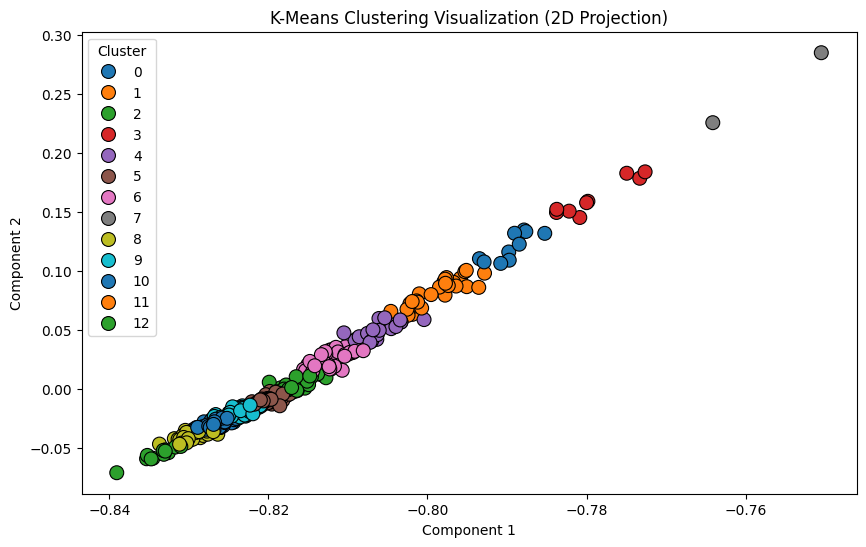

2025-03-09 17:46:27,079 : INFO : collecting all words and their counts
2025-03-09 17:46:27,081 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:46:27,086 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:46:27,096 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:46:27,097 : INFO : Creating a fresh vocabulary
2025-03-09 17:46:27,101 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:46:27.101567', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:46:27,106 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:46:27 

Finished executing at: 2025-03-09 17:46:27 

Executed at: 2025-03-09 17:46:27 



2025-03-09 17:46:27,345 : INFO : EPOCH 1: training on 24723 raw words (4721 effective words) took 0.1s, 53229 effective words/s
2025-03-09 17:46:27,457 : INFO : EPOCH 2: training on 24723 raw words (4668 effective words) took 0.1s, 48233 effective words/s
2025-03-09 17:46:27,590 : INFO : EPOCH 3: training on 24723 raw words (4713 effective words) took 0.1s, 40087 effective words/s
2025-03-09 17:46:27,707 : INFO : EPOCH 4: training on 24723 raw words (4771 effective words) took 0.1s, 46992 effective words/s
2025-03-09 17:46:27,817 : INFO : EPOCH 5: training on 24723 raw words (4656 effective words) took 0.1s, 50386 effective words/s
2025-03-09 17:46:27,910 : INFO : EPOCH 6: training on 24723 raw words (4622 effective words) took 0.1s, 57806 effective words/s
2025-03-09 17:46:28,028 : INFO : EPOCH 7: training on 24723 raw words (4647 effective words) took 0.1s, 44915 effective words/s
2025-03-09 17:46:28,146 : INFO : EPOCH 8: training on 24723 raw words (4680 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=50
Finished displaying at: 2025-03-09 17:46:32 

Executing 13 start time: 2025-03-09 17:46:32
K=13: Silhouette Score and WSS=0.0815	0.9016

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Jeffrey Sachs: Trump's tariff policy bound to fail
- In a first, new SC judges to take oath outdoors
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- Everyone can’t go to jail to meet Imran: IHC CJ

Cluster 1:
- We will never allow Fitna al-Khawarij to impose their outdated ideology on country: COAS
- Agri talks with China likely next month: Tanveer
- Imran’s attempts to engage military draw cold shoulder
- Taylor Swift's bodyguard Drew becomes viral sensation for protecting the star
- Breathe Pakistan: A cleaner tomorrow, one step at a time

Cluster 2:
- Saudi Arabia confirms alcohol ban at 2034 FIFA World Cup
- More than 500 million take ‘holy dip’ in India’s Maha Kumbh festival
- No alcohol for fans at World Cup

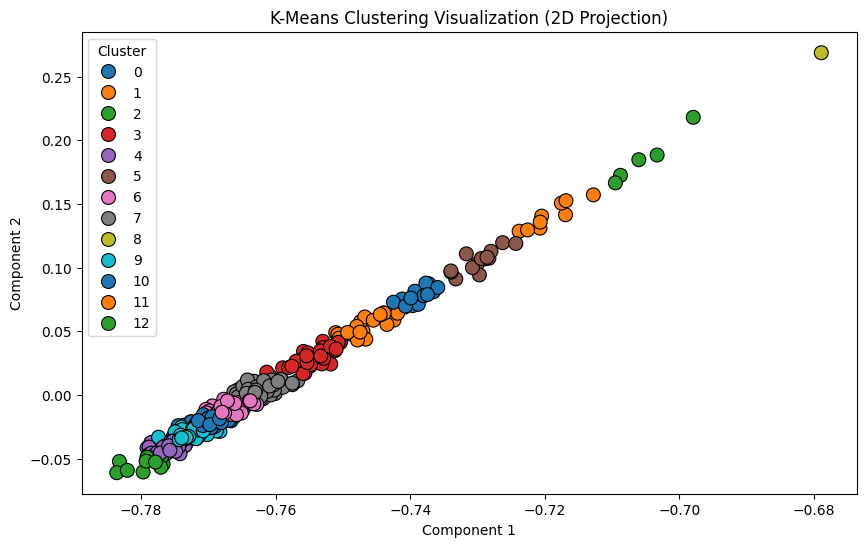

2025-03-09 17:46:33,191 : INFO : collecting all words and their counts
2025-03-09 17:46:33,194 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:46:33,198 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:46:33,206 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:46:33,212 : INFO : Creating a fresh vocabulary
2025-03-09 17:46:33,217 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:46:33.216038', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:46:33,220 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:46:33 

Finished executing at: 2025-03-09 17:46:33 

Executed at: 2025-03-09 17:46:33 



2025-03-09 17:46:33,378 : INFO : EPOCH 0: training on 24723 raw words (4696 effective words) took 0.1s, 47407 effective words/s
2025-03-09 17:46:33,503 : INFO : EPOCH 1: training on 24723 raw words (4713 effective words) took 0.1s, 47325 effective words/s
2025-03-09 17:46:33,627 : INFO : EPOCH 2: training on 24723 raw words (4670 effective words) took 0.1s, 43449 effective words/s
2025-03-09 17:46:33,778 : INFO : EPOCH 3: training on 24723 raw words (4697 effective words) took 0.1s, 35485 effective words/s
2025-03-09 17:46:33,921 : INFO : EPOCH 4: training on 24723 raw words (4654 effective words) took 0.1s, 37960 effective words/s
2025-03-09 17:46:34,067 : INFO : EPOCH 5: training on 24723 raw words (4777 effective words) took 0.1s, 38182 effective words/s
2025-03-09 17:46:34,194 : INFO : EPOCH 6: training on 24723 raw words (4650 effective words) took 0.1s, 42790 effective words/s
2025-03-09 17:46:34,349 : INFO : EPOCH 7: training on 24723 raw words (4691 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=100
Finished displaying at: 2025-03-09 17:46:43 

Executing 13 start time: 2025-03-09 17:46:43
K=13: Silhouette Score and WSS=0.0714	1.2513

Cluster 0:
- Haveli of Maharaja Ranjit Singh being conserved by WCLA
- Ishaq Dar to visit USA for UNSC meeting
- Everyone can’t go to jail to meet Imran: IHC CJ
- In a first, new SC judges to take oath outdoors
- Aurangzeb discusses Pakistan’s structural reforms with IFC chief

Cluster 1:
- Sri Lanka shares end higher; central bank sees inflation peak above target in Q2 next year
- Sher Afzal Marwat's 'Mujhe kyun nikala?' question sparks laughter in NA
- US awaits Arab plan for Gaza, Trump plan remains default option: Washington
- Saudi Arabia to host Arab summit on Trump’s Gaza plan
- Arab nations band together against Trump's Gaza plan

Cluster 2:
- Gold price soars by Rs2,500 per tola
- UK Pound further climbs up against Pakistani rupee – 14 February 2025
- Feb 14 last date to submit third installment for

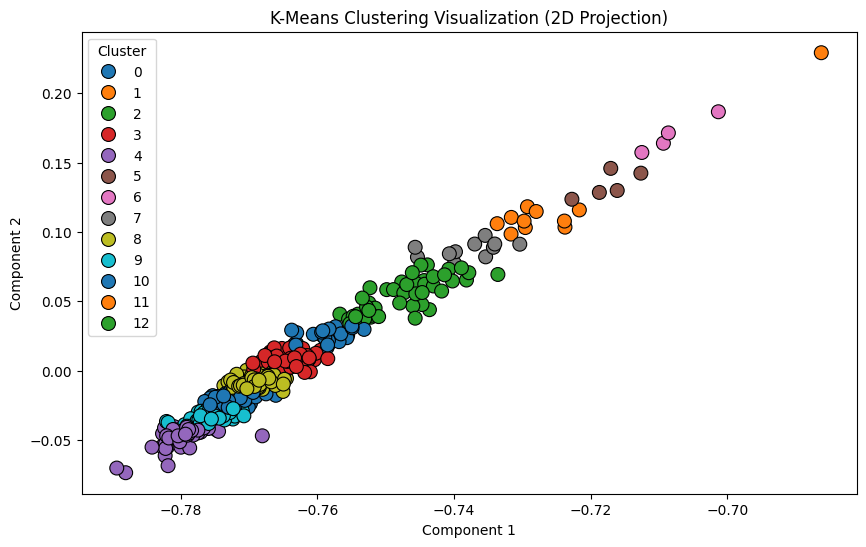

2025-03-09 17:46:44,527 : INFO : collecting all words and their counts
2025-03-09 17:46:44,529 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:46:44,531 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:46:44,545 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:46:44,550 : INFO : Creating a fresh vocabulary
2025-03-09 17:46:44,554 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:46:44.554369', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:46:44,557 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:46:44 

Finished executing at: 2025-03-09 17:46:44 

Executed at: 2025-03-09 17:46:44 



2025-03-09 17:46:44,787 : INFO : EPOCH 0: training on 24723 raw words (4661 effective words) took 0.2s, 28933 effective words/s
2025-03-09 17:46:44,950 : INFO : EPOCH 1: training on 24723 raw words (4722 effective words) took 0.1s, 36777 effective words/s
2025-03-09 17:46:45,056 : INFO : EPOCH 2: training on 24723 raw words (4667 effective words) took 0.1s, 52992 effective words/s
2025-03-09 17:46:45,176 : INFO : EPOCH 3: training on 24723 raw words (4707 effective words) took 0.1s, 45275 effective words/s
2025-03-09 17:46:45,311 : INFO : EPOCH 4: training on 24723 raw words (4686 effective words) took 0.1s, 39403 effective words/s
2025-03-09 17:46:45,457 : INFO : EPOCH 5: training on 24723 raw words (4624 effective words) took 0.1s, 36309 effective words/s
2025-03-09 17:46:45,617 : INFO : EPOCH 6: training on 24723 raw words (4712 effective words) took 0.1s, 35855 effective words/s
2025-03-09 17:46:45,749 : INFO : EPOCH 7: training on 24723 raw words (4688 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=150
Finished displaying at: 2025-03-09 17:46:59 

Executing 13 start time: 2025-03-09 17:46:59
K=13: Silhouette Score and WSS=0.0580	1.3022

Cluster 0:
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- Everyone can’t go to jail to meet Imran: IHC CJ
- 28 injured in car ramming attack in Munich
- JUI-F chief stands with journalists against PECA law
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC

Cluster 1:
- Intra-party: elections case ECP directs PPP to submit response
- CM Murad invites Japanese companies to invest in Karachi mass transit projects
- Commissioner travels in People’s Bus Service, takes information about facilities
- Non-banking microfinance sector: SECP announces series of initiatives to empower women, strengthen consumer protection
- Injuries disrupted England’s training during India ODI series: McCullum

Cluster 2:
- Pakistan’s 2nd polio case of 2025 reported in Badin
- Solar panel imports: 80 

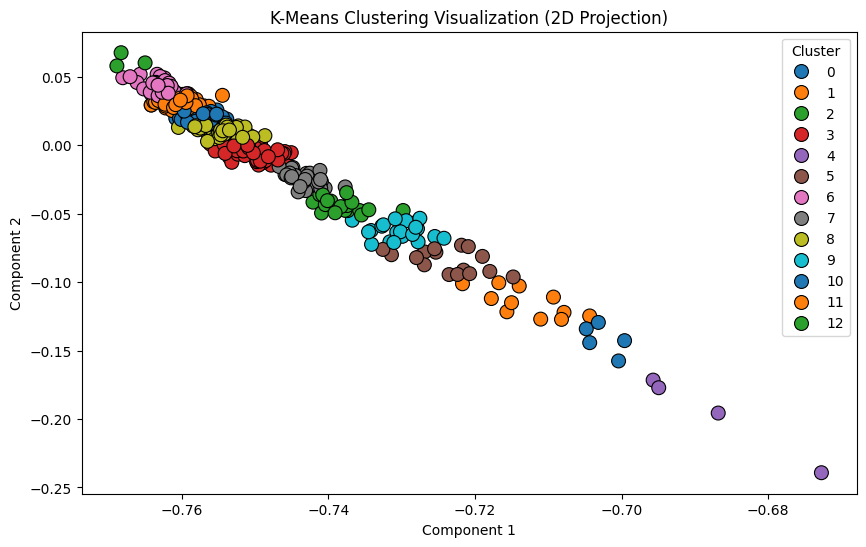

2025-03-09 17:47:00,093 : INFO : collecting all words and their counts
2025-03-09 17:47:00,094 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:47:00,095 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:47:00,101 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:47:00,104 : INFO : Creating a fresh vocabulary
2025-03-09 17:47:00,106 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:47:00.106662', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:47:00,108 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:47:00 

Finished executing at: 2025-03-09 17:47:00 

Executed at: 2025-03-09 17:47:00 



2025-03-09 17:47:00,365 : INFO : EPOCH 1: training on 24723 raw words (4742 effective words) took 0.1s, 60198 effective words/s
2025-03-09 17:47:00,431 : INFO : EPOCH 2: training on 24723 raw words (4684 effective words) took 0.1s, 82413 effective words/s
2025-03-09 17:47:00,497 : INFO : EPOCH 3: training on 24723 raw words (4759 effective words) took 0.1s, 82328 effective words/s
2025-03-09 17:47:00,561 : INFO : EPOCH 4: training on 24723 raw words (4689 effective words) took 0.1s, 83274 effective words/s
2025-03-09 17:47:00,625 : INFO : EPOCH 5: training on 24723 raw words (4606 effective words) took 0.1s, 81870 effective words/s
2025-03-09 17:47:00,689 : INFO : EPOCH 6: training on 24723 raw words (4678 effective words) took 0.1s, 89147 effective words/s
2025-03-09 17:47:00,755 : INFO : EPOCH 7: training on 24723 raw words (4716 effective words) took 0.1s, 85191 effective words/s
2025-03-09 17:47:00,817 : INFO : EPOCH 8: training on 24723 raw words (4746 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=200
Finished displaying at: 2025-03-09 17:47:17 

Executing 13 start time: 2025-03-09 17:47:17
K=13: Silhouette Score and WSS=0.0715	1.3531

Cluster 0:
- Jeffrey Sachs: Trump's tariff policy bound to fail
- Aurangzeb discusses Pakistan’s structural reforms with IFC chief
- CJP Afridi administers oath to newly-appointed SC judges
- Everyone can’t go to jail to meet Imran: IHC CJ
- Aurangzeb highlights increasing risks facing insurance industry

Cluster 1:
- Yango Pakistan joins hands with Elixs Bikes to introduce affordable EV bikes for partner’s drivers
- Two soldiers hurt in Indian firing at LoC
- Atif Aslam’s breakup advice gains attention and debate
- PGF’s ‘train the trainers program’ boosts golf coaching in Pakistan
- Iran says it will rebuild nuclear facilities if attacked following reports of planned Israeli strike

Cluster 2:
- UAE is offering 10-Year Visa; Guide for Pakistanis to apply in 2025
- Israeli military killed 85 journalists in 

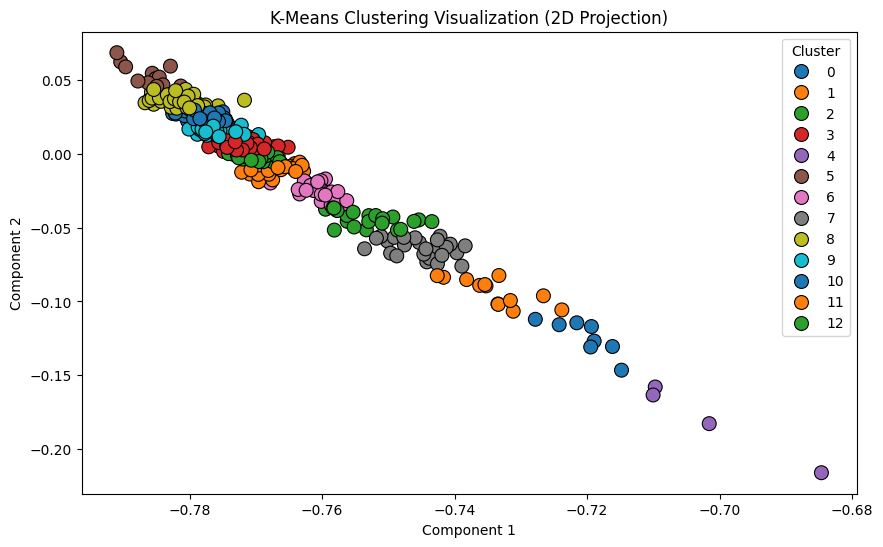

Finished displaying at: 2025-03-09 17:47:18 

Finished executing at: 2025-03-09 17:47:18 



In [1022]:
best_combination, best_Sil, best_WSS = run_combinations(13, best_combination, best_Sil, best_WSS)

In [1023]:
# Convert to DataFrame for easy export
results_df = pd.DataFrame(results, columns=['k', 'Vectorizer Type', 'vector_size', 'window', 'Epochs Count', 'Vectorizer Name', 'Silhouette Score', 'WSS Score'])

# Save results
results_df.to_csv("clustering_results.csv", index=False)

# Open the file automatically
os.startfile("clustering_results.csv")

results_df

,k,Vectorizer Type,vector_size,window,Epochs Count,Vectorizer Name,Silhouette Score,WSS Score
0,5,Word2Vec,400,15,25,Skipgram,0.150372,0.637759
1,5,Word2Vec,400,15,50,Skipgram,0.093724,1.216823
2,5,Word2Vec,400,15,100,Skipgram,0.102466,1.502084
3,5,Word2Vec,400,15,150,Skipgram,0.074429,1.652927
4,5,Word2Vec,400,15,200,Skipgram,0.081542,1.682458
5,9,Word2Vec,400,15,25,Skipgram,0.130931,0.644830
6,9,Word2Vec,400,15,50,Skipgram,0.104927,1.084337
7,9,Word2Vec,400,15,100,Skipgram,0.063117,1.366695
8,9,Word2Vec,400,15,150,Skipgram,0.086423,1.426755
9,9,Word2Vec,400,15,200,Skipgram,0.064165,1.481926


In [1024]:
# Convert to DataFrame for easy export
wss_scores_df = pd.DataFrame(wss_scores, columns=['k', 'Average WSS Score'])

wss_scores_df

,k,Average WSS Score
0,5,1.338410
1,9,1.200909
2,13,1.073653


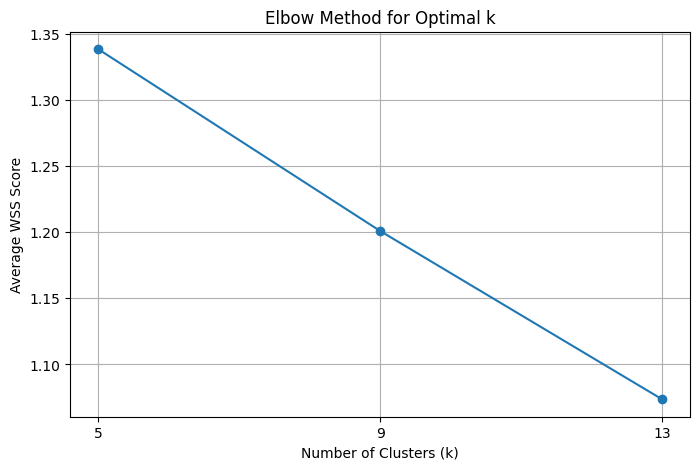

In [1025]:
# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(wss_scores_df['k'], wss_scores_df['Average WSS Score'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average WSS Score")
plt.title("Elbow Method for Optimal k")
plt.xticks(wss_scores_df['k'])  # Ensure all k values are shown on x-axis
plt.grid(True)

# Show the plot
plt.show()

In [1026]:
best_combination # vector size, window size, epoch

[13, 'word', 'Skipgram', 400, 15, 25, 0.117109165, 0.5601053833961487]